In [1]:
import pandas as pd
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator as kmf
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
import matplotlib.patches as mpatches

In [2]:
cell_type = 'Hepatocyte'
study = 'GSE14520'
cell_estimation = pd.read_csv('GSE14520.SVR.%s.Estimation.csv'%cell_type,index_col=0)
cell_estimation.head()
interest = cell_estimation.columns.values[0]

In [3]:
survival = pd.read_csv('GSE14520.Survival.csv',index_col=0)
survival.head()

,OS_E,OS,DFS_E,DFS
GSM,,,,
GSM363205,0,58.0,0,58.0
GSM363115,0,66.6,0,66.6
GSM362970,0,67.3,0,67.3
GSM363354,1,10.4,1,10.4
GSM363039,0,52.8,0,52.8


In [4]:
survival_test = cell_estimation.merge(survival,left_index=True,right_index=True,how='inner')
survival_test.head()

,Hepatocyte,OS_E,OS,DFS_E,DFS
GSM362947,0.052616,1,59.2,1,50.0
GSM362948,0.054623,0,61.4,1,8.8
GSM362949,0.062304,1,18.2,1,18.2
GSM362950,0.051584,0,57.5,1,30.1
GSM362952,0.083712,0,54.3,0,54.3


In [5]:
survival_reorder = survival_test.sort_values(interest,axis=0,ascending=False)
survival_E = {1:True,0:False}

In [6]:
test_type = 'DFS'
E = list(survival_reorder['%s_E'%test_type])
E = [survival_E[value] for value in E]
mid_point = int(len(E)/2)
E_high = E[:mid_point]
E_low = E[mid_point:]

S = list(survival_reorder['%s'%test_type])
S_high = S[:mid_point]
S_low = S[mid_point:]

In [7]:
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,4)
p

0.0004

Text(0.5, 1.0, 'GSE14520 Overall Survival vs. Hepatocyte Density')

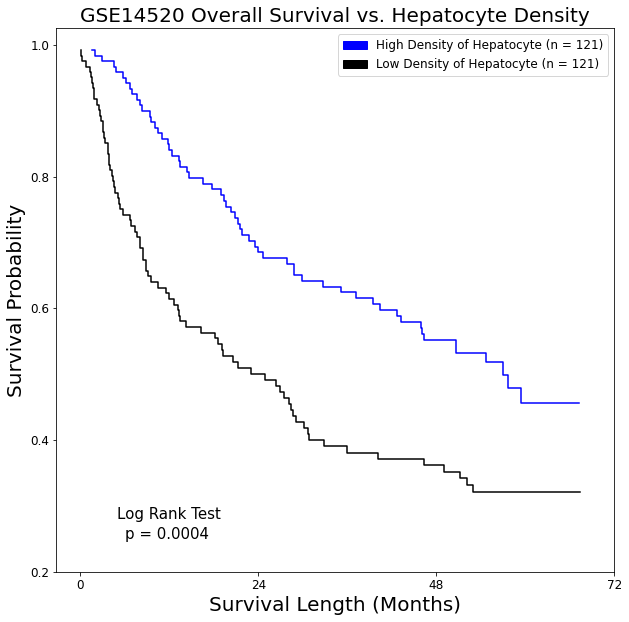

In [12]:
plt.figure(figsize=(10,10))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='b')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,73,24),fontsize=12)
plt.yticks(np.arange(0.2,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='b',label='High Density of %s (n = %s)'%(cell_type,len(E_high)))
low_patch = mpatches.Patch(color='k',label='Low Density of %s (n = %s)'%(cell_type,len(E_low)))
plt.text(5,0.28, 'Log Rank Test',fontsize=15)
plt.text(6,0.25, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=12)
plt.title('GSE14520 Overall Survival vs. %s Density'%cell_type,fontsize=20)
#plt.savefig('%s.%s.DFS.pdf'%(study,pdf_file),format='pdf')